<a href="https://colab.research.google.com/github/Hyperspectral01/Natural_Language_Computing/blob/main/2.Introduction_to_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Notebook has been created after referencing https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

Importing the Dependencies

In [ ]:
import torch
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torchvision.transforms import Lambda
import matplotlib.pyplot as plt
from torch import nn


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Mapping** the Output Classes to different Labels

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

Importing the FashionMNIST data and looking at the shapes

In [ ]:
training_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, index=torch.tensor(y), value=1))
)

In [ ]:
test_data=datasets.FashionMNIST(
    root="data",
    download=True,
    train=False,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10,dtype=torch.float).scatter_(dim=0,index=torch.tensor(y),value=1))
)

Now looking at the shapes of the datasets

In [ ]:
print(training_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Target transform: Lambda()


In [ ]:
print(test_data)

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()
Target transform: Lambda()


In [ ]:
print(training_data[0])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000

In [ ]:
training_data[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
training_data[0][1].shape

torch.Size([10])

Taking a sample image and a label

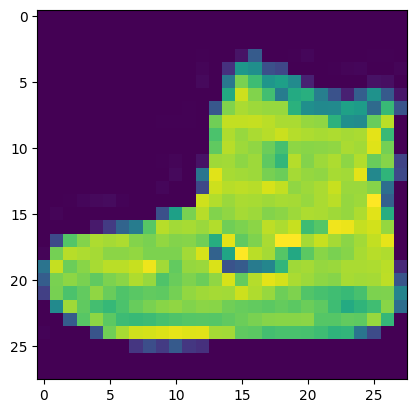

In [ ]:
plt.imshow(training_data[0][0][0])
# print(training_data[0][1].argmax(1))

# plt.title(labels_map[nn.Softmax(dim=1)(training_data[0][1]).argmax(1)])

We also have to learn a lot about **argmax()**

In [ ]:
print(test_data[0][0].shape)

torch.Size([1, 28, 28])


Creating data loaders for feeding data into the model

In [ ]:
training_data_loader=DataLoader(training_data,batch_size=64) #Trying without the shuffle

In [ ]:
testing_data_loader=DataLoader(test_data,batch_size=64) #Trying without the shuffle

Now creating a Linear-Relu Stack with the help of nn

In [ ]:
model=nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,512),
    nn.ReLU(),
    nn.Linear(512,512),
    nn.ReLU(),
    nn.Linear(512,10)
)

Now creating a loss function and an optimiser function

In [ ]:
loss_function=nn.CrossEntropyLoss();
learning_rate=0.001
optimiser=torch.optim.SGD(model.parameters(),lr=learning_rate)

Now entering the number of epochs by the user.

In [ ]:
epochs=int(input("Enter the number of epochs by the user:"))

Enter the number of epochs by the user:25


Now training the model manually with the help of a **training_function()**

In [ ]:
def training_function(training_data_loader,model,loss_function,optimiser):
  model.train()
  for batch,(x,y) in enumerate(training_data_loader):

    pred_y=model(x) #for predicting the value of y
    loss=loss_function(pred_y,y)  #How far the predicted value is from the real value
    loss.backward() #backward propagation
    optimiser.step()  #Changing the weights
    optimiser.zero_grad() #Making the gradient back to zero so it doesnt add up the next time

    if (batch%100==0):
      print("We are at ",(batch*64)+len(x),"/",60000)
      print("loss function value right now:",loss.item())


Creating the **testing_function()**

In [ ]:
def testing_function(testing_data_loader,model,loss_function):
  model.eval()
  total_loss=0
  correct=0
  batches=len(testing_data_loader)
  with torch.no_grad(): #GOD KNOWS they say its to avoid gradient calculation
    for (x,y) in testing_data_loader:
      logits=model(x)
      correct+=(nn.Softmax(dim=1)(logits).argmax(1)==y.argmax(1)).type(torch.float).sum().item()
      total_loss+=loss_function(logits,y).item()


  print("LOSS:",total_loss/batches)
  print("ACCURACY:",(correct/100))


Finally training the model to the data and testing for accuracy at the same time

In [ ]:
for i in range(epochs):
  print("---------------------- EPOCH - ",i+1," --------------------------")
  training_function(training_data_loader,model,loss_function,optimiser)
  testing_function(testing_data_loader,model,loss_function)

---------------------- EPOCH -  1  --------------------------
We are at  64 / 60000
loss function value right now: 0.7758098840713501
We are at  6464 / 60000
loss function value right now: 0.853373646736145
We are at  12864 / 60000
loss function value right now: 0.6181533336639404
We are at  19264 / 60000
loss function value right now: 0.8271179795265198
We are at  25664 / 60000
loss function value right now: 0.7223999500274658
We are at  32064 / 60000
loss function value right now: 0.7188476920127869
We are at  38464 / 60000
loss function value right now: 0.8165444135665894
We are at  44864 / 60000
loss function value right now: 0.78162682056427
We are at  51264 / 60000
loss function value right now: 0.7981761693954468
We are at  57664 / 60000
loss function value right now: 0.7519296407699585
LOSS: 0.7499158547562399
ACCURACY: 72.27
---------------------- EPOCH -  2  --------------------------
We are at  64 / 60000
loss function value right now: 0.7409875988960266
We are at  6464 / 60

**Accuracy** of **71.02%** over 10 epochs

**Accuracy** of **81.49%** over 25 epochs

In [ ]:
print(nn.Softmax(dim=1)(model(training_data[0][0])).argmax(1))

tensor([9])


**Doubt**:The dimensions are a little confusing,0 means across vertically, and 1 means across horizontally,or so i am guessing

**Saving** the model and its parameters in G-Drive

In [ ]:
torch.save(model.state_dict(),'/content/drive/MyDrive/Colab Notebooks/SEM_V/NLC/FashionMNIST_model_weights')
torch.save(model,'/content/drive/MyDrive/Colab Notebooks/SEM_V/NLC/FashionMNIST_model')

Examples of **argmax()**

In [ ]:
import torch

tensor = torch.tensor([[1, 2, 3],
                       [4, 5, 6]])

argmax_axis_0 = torch.argmax(tensor, dim=0) #Here the dimension is 0

argmax_axis_1 = torch.argmax(tensor, dim=1) #Here the dimension is 1

print("Tensor:")
print(tensor)

print("Argmax along axis 0 (columns):")
print(argmax_axis_0)

print("Argmax along axis 1 (rows):")
print(argmax_axis_1)


Tensor:
tensor([[1, 2, 3],
        [4, 5, 6]])
Argmax along axis 0 (columns):
tensor([1, 1, 1])
Argmax along axis 1 (rows):
tensor([2, 2])


Trying a few simple experiments with Tensors and shapes

In [ ]:
import torch

zeros_tensor = torch.zeros((2, 3))
ones_tensor = torch.ones((2, 3))

print("PyTorch Zeros Tensor:")
print(zeros_tensor)

print("PyTorch Ones Tensor:")
print(ones_tensor)

print("Shape of Zeros Tensor:")
print(zeros_tensor.shape)

print("Shape of Ones Tensor:")
print(ones_tensor.shape)

zeros_tensor.add_(ones_tensor)
print("In-place Addition of Zeros Tensor with Ones Tensor:")
print(zeros_tensor)

zeros_tensor.sub_(ones_tensor)
print("In-place Subtraction of Zeros Tensor with Ones Tensor:")
print(zeros_tensor)


PyTorch Zeros Tensor:
tensor([[0., 0., 0.],
        [0., 0., 0.]])
PyTorch Ones Tensor:
tensor([[1., 1., 1.],
        [1., 1., 1.]])
Shape of Zeros Tensor:
torch.Size([2, 3])
Shape of Ones Tensor:
torch.Size([2, 3])
In-place Addition of Zeros Tensor with Ones Tensor:
tensor([[1., 1., 1.],
        [1., 1., 1.]])
In-place Subtraction of Zeros Tensor with Ones Tensor:
tensor([[0., 0., 0.],
        [0., 0., 0.]])


Also any operations on tensor would result in a tensor,to extract the values use **item()**

In [ ]:
tensor1=torch.ones((3,2))
tensor2=tensor1.sum()
print(type(tensor2))
print(tensor2)

value_of_sum=tensor2.item()
print(type(value_of_sum))
print(value_of_sum)

<class 'torch.Tensor'>
tensor(6.)
<class 'float'>
6.0


Things can be converted to or from tensor and numpy

In [ ]:
#Numpy array to tensor
import numpy as np
array1=np.ones([2,4])
tensor1=torch.from_numpy(array1)
print(type(array1))
print(type(tensor1))
print(tensor1)


<class 'numpy.ndarray'>
<class 'torch.Tensor'>
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [ ]:
#Tensor to numpy array
import numpy as np
tensor1=torch.ones(2,4)
array1=tensor1.numpy()
print(type(tensor1))
print(type(array1))
print(array1)

<class 'torch.Tensor'>
<class 'numpy.ndarray'>
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]
